## Статистический анализ сервиса аренды самокатов GoFast

#### В этом проекте будем анализировать данные сервиса аренды самокатов и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти

In [1]:
#Импортиреум все библиотеки, каторые могут понадобиться при выполнении проекта
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial, exp
from math import sqrt
from random import randint
from scipy import stats as st
from scipy.stats import binom, poisson

#### Шаг 1. Загрузка данных

In [2]:
#Сахроняем файлы в датафреймы 
data_users = pd.read_csv('/datasets/users_go.csv')
data_rides = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'])
data_subscribe = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
#выводим на экран перве 10 строк
data_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
#выводим на экран перве 10 строк
data_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [5]:
#выводим на экран перве 10 строк
data_subscribe.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [6]:
#Выводим на экран информацию о датафреймах
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В датафрейме 5 столбцов, 1565 строк, тип данных int и object.  

In [7]:
#Выводим на экран информацию о датафреймах
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


В датафрейме 4 столбца, 18068 строк, тип данных int,object. Встолбце date нужно будет поменять тип данных object на datetime.

In [8]:
#Выводим на экран информацию о датафреймах
data_subscribe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В датафрейме 4 столбца, 2 строки, тип данных object и int.

#### Шаг 2. Предобработка данных

In [10]:
#в data-rides создаём столбец month(месяц)
data_rides['month'] = data_rides['date'].dt.month

In [11]:
#в data_rides округляем значение на верх и меняем тип данных из object на intю

data_rides['duration'] = np.ceil(data_rides['duration'])
data_rides['duration'] = data_rides['duration'].astype('int')
#выводим на экран первые 5 строк
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,26,2021-01-01,1
1,1,2617.592153,16,2021-01-18,1
2,1,754.159807,7,2021-04-20,4
3,1,2694.783254,19,2021-08-11,8
4,1,4028.687306,27,2021-08-28,8


In [12]:
#ещё раз 
data_rides.head(10)

,user_id,distance,duration,date,month
0,1,4409.919140,26,2021-01-01,1
1,1,2617.592153,16,2021-01-18,1
2,1,754.159807,7,2021-04-20,4
3,1,2694.783254,19,2021-08-11,8
4,1,4028.687306,27,2021-08-28,8
5,1,2770.890808,17,2021-10-09,10
6,1,3039.020292,15,2021-10-19,10
7,1,2842.118050,24,2021-11-06,11
8,1,3412.690668,16,2021-11-14,11
9,1,748.690645,16,2021-11-22,11


In [13]:
data_rides['date'].sort_values(ascending=False)

2576    2021-12-30
3278    2021-12-30
11752   2021-12-30
15704   2021-12-30
14115   2021-12-30
           ...    
2754    2021-01-01
13591   2021-01-01
2888    2021-01-01
13356   2021-01-01
0       2021-01-01
Name: date, Length: 18068, dtype: datetime64[ns]

In [15]:
#проверяем есть ли пропущенные значения
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [16]:
#проверяем есть ли пропущенные значения
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [17]:
data_rides['duration'].value_counts()

19    1198
18    1190
21    1122
16    1119
20    1119
17    1095
15    1080
14     991
22     958
13     923
23     815
12     742
24     684
11     638
25     561
26     498
10     469
27     397
9      330
28     288
29     271
8      234
30     197
7      185
31     164
6      143
32     137
33      96
5       95
1       95
34      71
4       55
35      47
3       33
36      14
37       7
39       3
40       2
41       1
38       1
Name: duration, dtype: int64

In [18]:
#проверяем есть ли пропущенные значения
data_subscribe.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [19]:
#проверяем есть ли дупликаты
data_users.duplicated().sum()

31

In [20]:
#удаляем дубликаты 
data_users = data_users.drop_duplicates()
data_users = data_users.reset_index(drop=True)

In [21]:
#проверяем есть ли дупликаты
data_users.duplicated().sum()

0

In [22]:
#проверяем есть ли дупликаты
data_rides.duplicated().sum()

0

In [23]:
#проверяем есть ли дупликаты
data_subscribe.duplicated().sum()

0

#### Шаг 3. Исследовательский анализ данных

In [24]:
#ислдуем данные датафрейма
data_users.describe()

,user_id,age
count,1534.000000,1534.000000
mean,767.500000,24.903520
std,442.971971,4.572367
min,1.000000,12.000000
25%,384.250000,22.000000
50%,767.500000,25.000000
75%,1150.750000,28.000000
max,1534.000000,43.000000


In [25]:
#ислдуем данные датафрейма
data_rides.describe()

,user_id,distance,duration,month
count,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,18.303520,6.486772
std,434.734317,1116.831209,6.094928,3.437410
min,1.000000,0.855683,1.000000,1.000000
25%,487.000000,2543.226360,14.000000,4.000000
50%,889.000000,3133.609994,18.000000,6.000000
75%,1213.250000,3776.222735,22.000000,9.000000
max,1534.000000,7211.007745,41.000000,12.000000


In [26]:
#ислдуем данные датафрейма
data_subscribe.describe()

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


count          1534
unique            8
top       Пятигорск
freq            219
Name: city, dtype: object

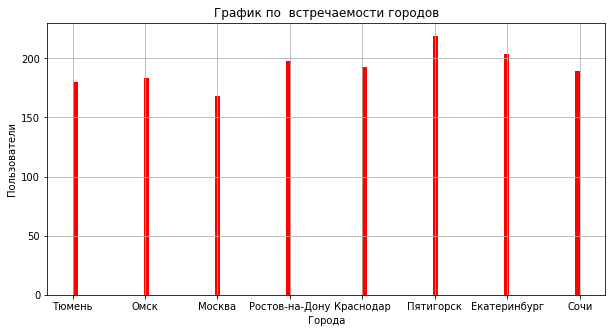

In [27]:
data_users['city'].hist(bins=100, figsize=(10,5), facecolor='red');
plt.title('График по  встречаемости городов')
plt.xlabel('Города')
plt.ylabel('Пользователи')
data_users['city'].describe()

count          1534
unique            8
top       Пятигорск
freq            219
Name: city, dtype: object

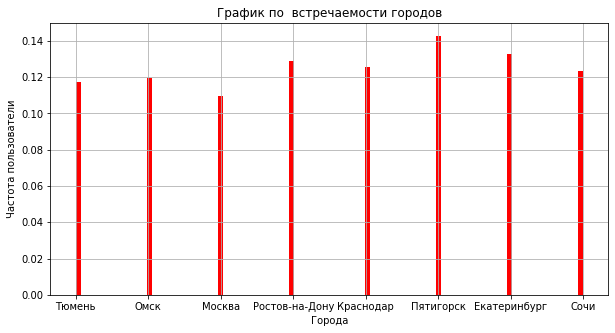

In [28]:
#получаем график  по  встречаемости городов
data_users['city'].hist(bins=100, figsize=(10,5), facecolor='red',
                        weights=np.ones_like (data_users['city']) / len (data_users['city']));
plt.title('График по  встречаемости городов')
plt.xlabel('Города')
plt.ylabel('Частота пользователи')
data_users['city'].describe()

In [29]:
city_count = pd.pivot_table(data_users,index="city", values="user_id",aggfunc=('count'))
city_count

,user_id
city,
Екатеринбург,204
Краснодар,193
Москва,168
Омск,183
Пятигорск,219
Ростов-на-Дону,198
Сочи,189
Тюмень,180


Text(0, 0.5, 'Города')

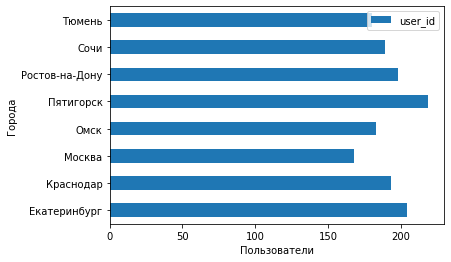

In [30]:
city_count.plot(kind='barh');
plt.xlabel('Пользователи')
plt.ylabel('Города')

По графику видно, что самое большое каличество пользавателей находятся в Пятигорске.

count     1534
unique       2
top       free
freq       835
Name: subscription_type, dtype: object

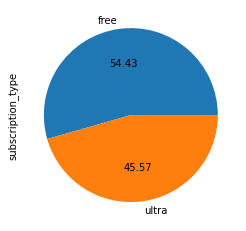

In [31]:
#получаем график соотношение пользователей с подпиской и без подписки
data_users['subscription_type'].value_counts().plot.pie(autopct='%.2f');
data_users['subscription_type'].describe()

Люди больше пользуются безподписки, чем с подпиской.

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

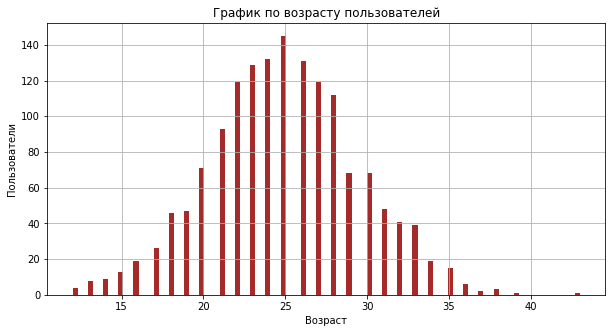

In [32]:
#получаем график по возрасту пользователей
data_users['age'].hist(bins=100, figsize=(10,5), facecolor='brown');
plt.title('График по возрасту пользователей')
plt.xlabel('Возраст')
plt.ylabel('Пользователи')
data_users['age'].describe()

Большинство пользователей до 25 лет. 

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

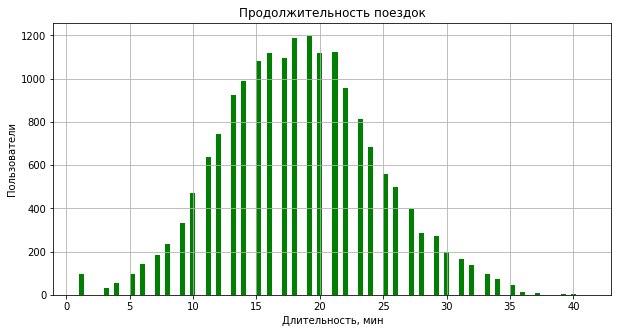

In [33]:
#получаем график по продолжительностьи поездок
data_rides['duration'].hist(bins=100, figsize=(10,5), facecolor='green');
plt.title('Продолжительность поездок');
plt.xlabel('Длительность, мин')
plt.ylabel('Пользователи')
data_rides['duration'].describe()

Видим продолжительность поездок по медиане 18 мин.

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

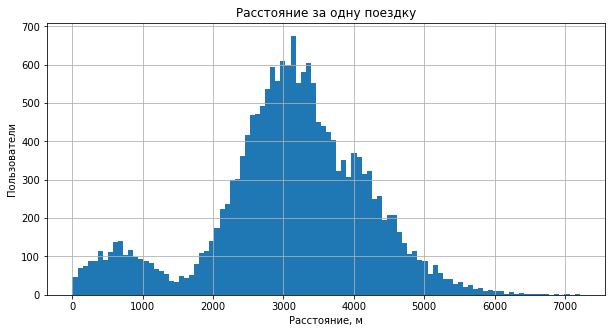

In [34]:
#получаем график по расстоянии, которой пользователь преодолел за одну поездку
data_rides['distance'].hist(bins=100, figsize=(10,5));
plt.title('Расстояние за одну поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Пользователи')
data_rides['distance'].describe()

В основном среднее  расстояние поездки 3100м-ов.

### Вывод
По соотношению городов самое большое количество пользователей из Пятигорска. Пользователи больше предпочитают вариант без подписки. В среднем пользователи возраста 25 лет. Длительность поездок в среднем 18 мин. Расстояние, которое пользователь преодолел за одну поездку в среднем 3100м.

#### Шаг 4. Объединение данных

In [35]:
print('\nDataFrame Shape :', data_users.shape) 
print('\nNumber of rows :', data_users.shape[0])
print('\nNumber of columns :', data_users.shape[1])


DataFrame Shape : (1534, 5)

Number of rows : 1534

Number of columns : 5


In [36]:
print('\nDataFrame Shape :', data_rides.shape) 
print('\nNumber of rows :', data_rides.shape[0])
print('\nNumber of columns :', data_rides.shape[1])


DataFrame Shape : (18068, 5)

Number of rows : 18068

Number of columns : 5


In [37]:
print('\nDataFrame Shape :', data_subscribe.shape) 
print('\nNumber of rows :', data_subscribe.shape[0])
print('\nNumber of columns :', data_subscribe.shape[1])


DataFrame Shape : (2, 4)

Number of rows : 2

Number of columns : 4


In [38]:
#объединаем данные data_users, data_rides,data_subscribe с помощю merge() в один столбец
data_total = data_rides.merge(data_users,on='user_id', how='left')
data_total = data_total.merge(data_subscribe, on='subscription_type', how='left')
#выводим на экран первые 10 строк
data_total.head(10)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,26,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,16,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,7,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,19,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,27,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,17,2021-10-09,10,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,15,2021-10-19,10,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,24,2021-11-06,11,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,16,2021-11-14,11,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,16,2021-11-22,11,Кира,22,Тюмень,ultra,6,0,199


In [39]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  int64         
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(3)
memory usage: 1.8+ MB


In [40]:
data_total.shape
print('\nDataFrame Shape :', data_total.shape) 
print('\nNumber of rows :', data_total.shape[0])
print('\nNumber of columns :', data_total.shape[1])


DataFrame Shape : (18068, 12)

Number of rows : 18068

Number of columns : 12


In [41]:
data_total.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Соединили три датафрейма и сохранили в новый датафрейм data_total.Датафреймы  data_user и data_rides соединили по.data_subscribe соединили уже с действуюшим датафреймом data_total. По скольку столбец subscribtion_type был в двух датафреймах столбцы уменьшились.Проверили пропуски,их нету.

In [42]:
#создаём отдельную переменную с данными о пользавателях по подписке
data_sub = data_total.query('subscription_type == "ultra"').reset_index()
#выводим на экран первые 10 строк
data_sub.head(10)

,index,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,0,1,4409.919140,26,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,1,2617.592153,16,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,2,1,754.159807,7,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,3,1,2694.783254,19,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,4,1,4028.687306,27,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
5,5,1,2770.890808,17,2021-10-09,10,Кира,22,Тюмень,ultra,6,0,199
6,6,1,3039.020292,15,2021-10-19,10,Кира,22,Тюмень,ultra,6,0,199
7,7,1,2842.118050,24,2021-11-06,11,Кира,22,Тюмень,ultra,6,0,199
8,8,1,3412.690668,16,2021-11-14,11,Кира,22,Тюмень,ultra,6,0,199
9,9,1,748.690645,16,2021-11-22,11,Кира,22,Тюмень,ultra,6,0,199


In [43]:
data_sub.shape
print('\nDataFrame Shape :', data_sub.shape) 
print('\nNumber of rows :', data_sub.shape[0])
print('\nNumber of columns :', data_sub.shape[1])


DataFrame Shape : (6500, 13)

Number of rows : 6500

Number of columns : 13


In [44]:
data_sub.isna().sum()

index                0
user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [45]:
#создаём отдельную переменную с данными о пользавателях без подписки
data_not_sub = data_total.query('subscription_type == "free"').reset_index()
#выводим на экран первые 10 строк
data_not_sub.head(10)

,index,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,6500,700,2515.690719,15,2021-01-02,1,Айдар,22,Омск,free,8,50,0
1,6501,700,846.932642,17,2021-02-01,2,Айдар,22,Омск,free,8,50,0
2,6502,700,4004.434142,21,2021-02-04,2,Айдар,22,Омск,free,8,50,0
3,6503,700,1205.911290,10,2021-02-10,2,Айдар,22,Омск,free,8,50,0
4,6504,700,3047.379435,18,2021-02-14,2,Айдар,22,Омск,free,8,50,0
5,6505,700,4342.002254,23,2021-02-23,2,Айдар,22,Омск,free,8,50,0
6,6506,700,3798.334905,19,2021-03-03,3,Айдар,22,Омск,free,8,50,0
7,6507,700,2984.551206,16,2021-04-09,4,Айдар,22,Омск,free,8,50,0
8,6508,700,3360.107141,17,2021-06-12,6,Айдар,22,Омск,free,8,50,0
9,6509,700,2567.543847,12,2021-06-23,6,Айдар,22,Омск,free,8,50,0


In [46]:
data_not_sub.shape
print('\nDataFrame Shape :', data_not_sub.shape) 
print('\nNumber of rows :', data_not_sub.shape[0])
print('\nNumber of columns :', data_not_sub.shape[1])


DataFrame Shape : (11568, 13)

Number of rows : 11568

Number of columns : 13


In [47]:
data_not_sub.isna().sum()

index                0
user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

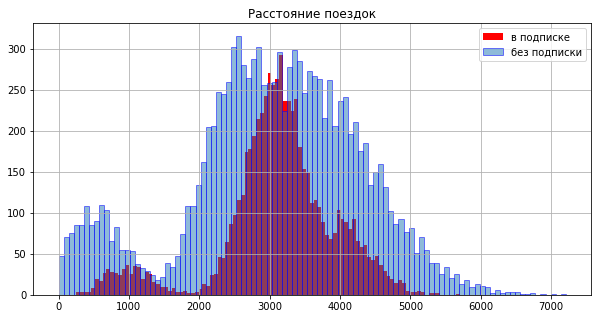

In [48]:
#визуализируем информацию о расстоянии поездок для пользователей обеих категорий
data_sub['distance'].hist(bins=100, figsize=(10,5),color='red', label='в подписке');
data_not_sub['distance'].hist(bins=100, figsize=(10,5), ec='b', alpha=0.5, label='без подписки');
plt.title('Расстояние поездок');
plt.legend();

 Можно предположить, что люди без подписки предпочитают дальные дороги.

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

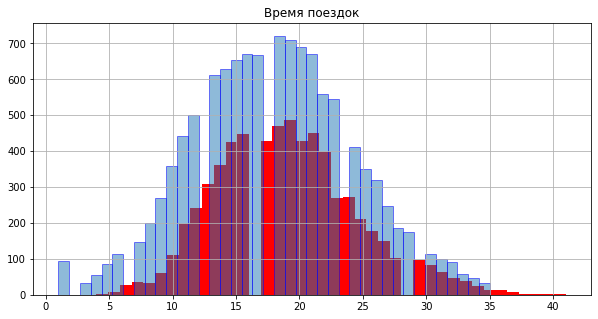

In [49]:
#визуализируем информацию о времени поездок для пользователей обеих категорий
data_sub['duration'].hist(bins=40, figsize=(10,5), color='red');
data_not_sub['duration'].hist(bins=40, figsize=(10,5), ec='b',alpha=0.5);
plt.title('Время поездок');
display(data_sub['duration'].describe())
data_not_sub['duration'].describe()

Можно предположить,что такая же ситуация тут. Длительность аренды без подписок больше.

#### Шаг 5. Подсчёт выручки

In [50]:
#Создаём новый датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными 
#с помощю pivot_table
data_total_pivot = data_total.pivot_table(index=['user_id','month'],values=['distance','duration','name','subscription_type',
                                                                            'minute_price'],
                                          aggfunc={'distance': 'sum', 'duration': 'sum', 'name':'count',
                                                  'subscription_type' : "first"})
#создаём столбцы
data_total_pivot.columns = ['distance_total', 'duration_total', 'ride_count', 'sub_type']
pd.set_option('display.max_rows', None)
data_total_pivot

distance_total  duration_total  ride_count sub_type
user_id month                                                     
1       1         7027.511294              42           2    ultra
        4          754.159807               7           1    ultra
        8         6723.470560              46           2    ultra
        10        5809.911100              32           2    ultra
        11        7003.499363              56           3    ultra
        12        6751.629942              28           2    ultra
2       3        10187.723006              63           3    ultra
        4         6164.381824              40           2    ultra
        6         3255.338202              14           1    ultra
        7         6780.722964              48           2    ultra
        8          923.007439               7           1    ultra
        10        2824.636598              19           1    ultra
        12        3828.248580              12           1    ultra
3       1         3061.777147              13           1    ultra
        2         5421.152016              39           2    ultra
        4         2956.651632              21           1    ultra
        5         9064.026918              63           3    ultra
        7        10919.595403              67           3    ultra
        9         2891.012822              23           1    ultra
        12        2593.381928              13           1    ultra
4       2         6339.696747              49           2    ultra
        6         6753.041806              45           2    ultra
        7        10491.175555              56           3    ultra
        8         4649.488243              36           1    ultra
        10       13260.762274              79           4    ultra
        11        3343.025291              28           2    ultra
5       1         3914.646990              13           1    ultra
        2         2561.108241              12           1    ultra
        3        10633.732186              57           3    ultra
        4         3373.080412              15           1    ultra
        5         5823.074031              33           2    ultra
        7         3311.974724              12           1    ultra
        8         2720.817111              18           1    ultra
        10        3218.515955              20           1    ultra
6       2         3961.432708              28           1    ultra
        5        11013.574364              72           3    ultra
        8         3142.271823              17           1    ultra
        9         3346.098372              20           1    ultra
        10        2350.641957              11           1    ultra
        11        3339.625640              17           1    ultra
        12        6924.961829              44           2    ultra
7       1         6478.080979              28           2    ultra
        3         3679.561009              21           1    ultra
        4         4888.946162              38           2    ultra
        5         2971.564811              15           1    ultra
        6         2508.554171              19           1    ultra
        7         6097.825669              35           2    ultra
        8         3008.257505              15           1    ultra
        11       12879.354733              67           4    ultra
        12        6195.334108              30           2    ultra
8       5         2869.032355              19           1    ultra
        6         3892.720292              27           1    ultra
        8         6412.694176              32           2    ultra
        12        2579.814633              15           1    ultra
9       3         5318.861723              39           2    ultra
        4         3958.215332              17           1    ultra
        6         2798.834754              17           1    ultra
        8         2717.035685              11           1    u

In [51]:
data_total_pivot.isna().sum()

distance_total    0
duration_total    0
ride_count        0
sub_type          0
dtype: int64

In [52]:
#создаём функцию для получении помесячной выручки,который принёс каждый пользователь(с подпиской и без).
def revenue(row):
    distance_total = row['distance_total']
    duration_total = row['duration_total']
    ride_count = row['ride_count']
    sub_type = row['sub_type']
    if sub_type == 'ultra':
        return 199+row['duration_total']*6
    if sub_type == 'free':
        return row['ride_count']*50+row['duration_total']*8
#создаём новый столбец и сохраняем получённую инф-у в нём
data_total_pivot['revenue'] = data_total_pivot.apply(revenue, axis=1)
data_total_pivot.head()

distance_total  duration_total  ride_count sub_type  revenue
user_id month                                                              
1       1         7027.511294              42           2    ultra      451
        4          754.159807               7           1    ultra      241
        8         6723.470560              46           2    ultra      475
        10        5809.911100              32           2    ultra      391
        11        7003.499363              56           3    ultra      535

In [53]:
# Код ревьюера
data_total_pivot.groupby('sub_type')['revenue'].mean().to_frame().round(2)

,revenue
sub_type,
free,328.64
ultra,362.79


#### Шаг 6. Проверка гипотез

In [54]:
#проверяем гипотезу. Тратят ли больше времени на аренду пользователи с подпиской,чем без подписки
#используем метод ttest_ind
free_dur = data_not_sub['duration']
ultra_dur = data_sub['duration']
alpha = 0.05
results = st.ttest_ind(ultra_dur,free_dur, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


 Нулевая гипотеза:трата времени у пользователей с подпиской и без подписки равны.
 
 Альтернативная гипотеза:пользователи с подпиской тратят больше времени чем пользователи без подписки.
 
 Результат ttest-а:отвергаем нулевую гипотезу. По результатам уровень значимасти превышает p-value(вероятность) нулевой гипотезы.Могу сказать,что нулевая гипотеза маловераятно при условии, что гипотеза верна.

### Вывод

В этом случае можно сделать акцию, что бы пользовотели без подписки приобрели подписку.

In [55]:
#проверяем гипотезу.  Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
#3130 метров
ultra_dis = data_sub['distance']
interested_value = 3130
alpha = 0.05
results = st.ttest_1samp(ultra_dis, interested_value, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза:среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 
3130 метров.

Альтернативная гипотеза:Подписчики в среднем проезжают расстояние больше оптимального.


Результат ttest-а:Не получилось отвергнуть нулевую гипотезу. По результатам уровень значимасти не превышает p-value(вероятность) нулевой гипотезы.Могу сказать,что альтернативная гипотеза маловераятно при условии, что гипотеза верна.



In [56]:
#проверяем гипотезу.будет ли помесячная выручка от пользователей с подпиской по месяцам выше, 
#чем выручка от пользователей без подписки
ultra_month = data_total_pivot.loc[data_total_pivot.sub_type == 'ultra', 'revenue']
free_month = data_total_pivot.loc[data_total_pivot.sub_type == 'free', 'revenue']

alpha = 0.05
results = st.ttest_ind(ultra_month, free_month, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергается:помесячная выручка равна(с подпиской и без).

Альтернативная гипотеза:помесячная выручка от пользователей с подпиской по месяцам выше, 
чем выручка от пользователей без подписки.

Результат ttest-а:отвергаем нулевую гипотезу.По результатам помесячная выручка в подписке выше, чем без подписки.

Значит можно предположить,что от пользователей с подпиской больше выручки. Так же приходим к выводу, что нужно сделать бизнес план по увеличению пользователей с подпиской.

Что бы понять снизилось ли обращение в техподержку, после замены сервера,можно использавать scipy.stats.ttest_ind,одностороннюю(alternative='less'). Этим прверяют гипотезу о равенстве средних двух генеральных совокупностей выборок. 

### Вывод

Сохранила файлы в трёх датафреймах. Изучила данные. Пропущенных значении не было. Были явные дубликаты в датафрейме data_user, удалила и перепроверила данные. В data_rides поменяла тип данных дата из object на datetime, округлила значение duration и поменяла тип из float на int.Получила график по встречаемости городов. Выявили, что самое большое каличество пользавателей находятся в Пятигорске(219 пользователей).Получила график соотношение пользователей с подпиской и без подписки. Больше пользователей без подписки, чем с подпиской.Получила график по возрасту пользователей.Большинство пользователей до 25 лет. Получила график по продолжительностьи поездок, в среднем получается 18 мин.Получила график по расстоянии, которой пользователь преодолел за одну поездку. Число  в среднем варируется от 3100м. Объединила данные data_users, data_rides,data_subscribe с помощю merge() в один столбец data_total. Создала ещё два датафрейма на основе с данными пользователях с подписками и без-data_sub, data_not_sub.
Построили графики с информацией о расстоянии и о времени поездок для пользователей обеих категорий. Создала новый датафрейм  data_total_pivot с агрегированными данными о поездках на основе датафрейма с объединёнными данными с помощю pivot_table. Получила помесячную выручки,которую принёс каждый пользователь(с подпиской и без).


Проверила гипотезу:тратят ли больше времени на аренду пользователи с подпиской,чем без подписки
по методу ttest_ind, alternative='greater'. ttest показывает, что можно отвергнуть нулевую гипотезу.По результатам уровень значимасти превышает p-value(вероятность) нулевой гипотезы.Могу сказать,что нулевая гипотеза маловераятно при условии, что гипотеза верна


Проверила гипотезу:cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130 метров. Не смогли отвергнуть нулевую гипотезу.По результатам уровень значимасти не превышает p-value(вероятность) нулевой гипотезы.Могу сказать,что альтернативная гипотеза маловераятно при условии, что гипотеза верна.

Проверила гипотезу:будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Нулевая гипотеза отвергается. Значит можно предположить,что от пользователей с подпиской больше выручки,чем без.

 ### Рекомендация
 Можно сделать бизнес план, каторый поможет добавит больше подписчиков.